In [1]:
from pathlib import Path
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision import datasets ,transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')


CUDA is available!  Training on GPU ...


In [2]:
PATH_train="fruits-360_dataset/fruits-360/Training"
PATH_test="fruits-360_dataset/fruits-360/Test"


TRAIN = Path(PATH_train)

TEST = Path(PATH_test)


num_workers = 2

batch_size = 400


train_transforms = transforms.Compose([ transforms.RandomCrop(100, padding=4, padding_mode='reflect'), 
                         transforms.Resize((100,100)),
                         transforms.RandomHorizontalFlip(), 
                         transforms.ToTensor(), 
                               ])

test_transforms= transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize((100,100)),
                                                        ])


train_data = datasets.ImageFolder(TRAIN, transform=train_transforms)
test_data = datasets.ImageFolder(TEST, transform=test_transforms)


#切割資料集
torch.manual_seed(43)
val_size = round(len(train_data) * 0.2)
train_size = round(len(train_data) - val_size)
 
 
train_ds, val_ds = random_split(train_data, [train_size, val_size])
len(train_ds), len(val_ds)


train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, num_workers=num_workers,shuffle=True,pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size*2,  num_workers=num_workers,pin_memory=True)
valid_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size*2,  num_workers=num_workers,pin_memory=True)




dataset_size = len(train_loader)
test_dataset_size = len(test_loader)

images, labels=next(iter(train_loader))
print(images.shape, labels.shape)

torch.Size([400, 3, 100, 100]) torch.Size([400])


In [3]:
len(train_loader),len(test_loader)

(136, 29)

In [4]:
data_dir = './fruits-360_dataset/fruits-360/'
 
classes = os.listdir(data_dir + "Training")
print(f'Total Number of Classe {len(classes)}')
print(f'Classes Names: {classes}')

Total Number of Classe 131
Classes Names: ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', '

In [6]:
class FruitCnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 16, kernel_size=2, padding=1), #99
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), #99/2=50
 
 
            nn.Conv2d(16, 32, kernel_size=2, stride=1, padding=1), #49
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), #49/2=25
 
 
            nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),#24
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(5, 5), #24/5=5
 
 
            nn.Flatten(), 
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(64*5*5, 131))
        
    def forward(self, xb):
      return self.network(xb)
 
  
model = FruitCnnModel()
model

FruitCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Dropout(p=0.5, inplace=False)
    (14): ReLU()
    (15): Linear(in_features=1600, out_features=131, bias=True)
  )

In [7]:
if train_on_gpu:
    model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
n_epochs = 4
valid_loss_min = np.Inf 

train_losses, valid_losses = [], []
for epoch in range(1, n_epochs+1):
    
    train_loss = 0.0
    valid_loss = 0.0
    print('running epoch: {}'.format(epoch))
    
    model.train()
    for data, target in train_loader:
        
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        optimizer.zero_grad()
       
        output = model(data)
        
        loss = criterion(output, target)
        
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()*data.size(0)
        
    
    model.eval()
    for data, target in valid_loader:
        
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        output = model(data)
        
        loss = criterion(output, target)
         
        valid_loss += loss.item()*data.size(0)
    
    
    train_losses.append(train_loss/len(train_loader.dataset))
    valid_losses.append(valid_loss/len(valid_loader.dataset))
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    
    
     
    print('\tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(train_loss, valid_loss))
    
    
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
        
        torch.save(model.state_dict(), 'model_CNN.pth')
        valid_loss_min = valid_loss
        

running epoch: 1
	Training Loss: 1.279086 	Validation Loss: 0.130870
Validation loss decreased (inf --> 0.130870).  Saving model ...
running epoch: 2
	Training Loss: 0.133416 	Validation Loss: 0.033106
Validation loss decreased (0.130870 --> 0.033106).  Saving model ...
running epoch: 3
	Training Loss: 0.059184 	Validation Loss: 0.014850
Validation loss decreased (0.033106 --> 0.014850).  Saving model ...
running epoch: 4
	Training Loss: 0.038859 	Validation Loss: 0.014931


In [9]:
def test(loaders, model, criterion, use_cuda):

    
    test_loss = 0.
    correct = 0.
    total = 0.
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders):
        
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        
        output = model(data)
        
        loss = criterion(output, target)
        
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        pred = output.data.max(1, keepdim=True)[1]
        
        correct += np.sum(pred.eq(target.data.view_as(pred)).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}'.format(test_loss))
    print('Test Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))
    

use_cuda = torch.cuda.is_available()
test(test_loader, model, criterion, use_cuda)      


Test Loss: 0.087553
Test Accuracy: 98% (22248/22688)


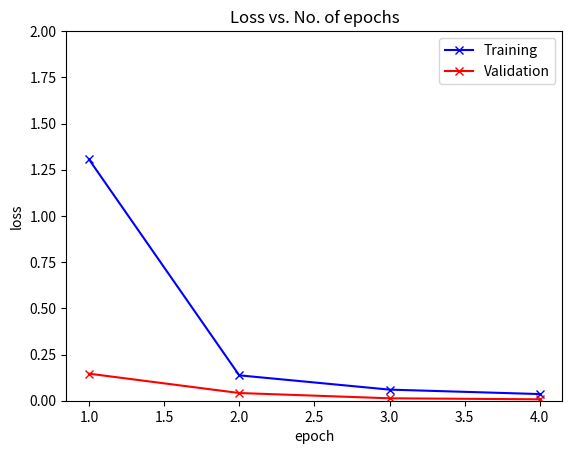

In [16]:
train_losses = [x for x in train_losses]
epochs=[1,2,3,4]
val_losses = [x for x in valid_losses]
plt.plot(epochs,train_losses, '-bx')
plt.plot(epochs,val_losses, '-rx')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0,2)
plt.legend(['Training', 'Validation'])
plt.title('Loss vs. No. of epochs');

plt.show()

In [10]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = (img.unsqueeze(0).cuda())
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_data.classes[preds[0].item()]

Label: Grape White 2 Predicted: Grape White 2


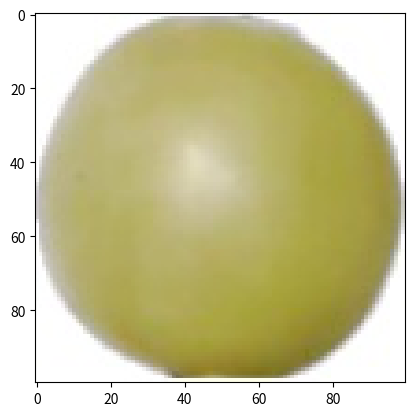

In [18]:
img, label = test_data[8000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_data.classes[label], 'Predicted:', predict_image(img, model))